In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

ln: failed to create symbolic link '/content/data': File exists
Updating fastai...
Done.


In [0]:
from fastai import *
from fastai.vision import *
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!unzip -qq 'gdrive/My Drive/data.zip'

In [0]:
!mv 'data/val' 'data/valid'

In [0]:
#tfms = get_transforms(do_flip=False)
path = '/content/data/'
data = ImageDataBunch.from_folder(path,ds_tfms=get_transforms(do_flip=False), size=224)

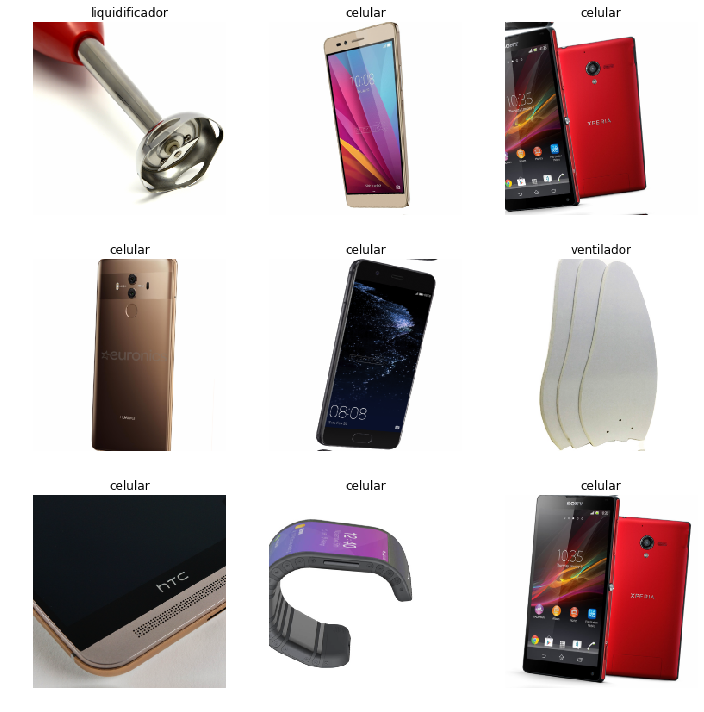

In [0]:
data.show_batch(rows=3, figsize=(10,10))

In [0]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

my_trained_mod = create_cnn(data, models.resnet34, metrics=error_rate)
my_trained_mod.fit_one_cycle(6)


In [0]:
filename = '/content/data/test/ventilador/Image153.jpg'
img = open_image(filename)
img

In [0]:
pred = my_trained_mod.predict(img)
print(pred)